***Q1. Read seed data and display the first five rows of the data set***

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pandas import Series, DataFrame
df = pd.read_csv('seeds.csv')
df.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
# Extract features and labels
from sklearn.preprocessing import StandardScaler


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalize the data
sc = StandardScaler()
X = sc.fit_transform(X)

***Q2. Find the optimum number of k in range 2-10 for k means***

Text(0, 0.5, 'SSD')

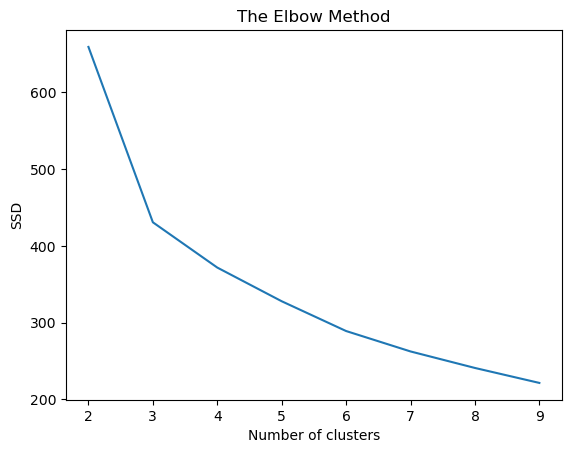

In [7]:
from sklearn.cluster import KMeans

ssd = []
for k in range(2,10):
    kmean = KMeans(n_clusters = k).fit(X)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSD')

***Q3. Find the labels using k means***

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df)
kmeans.labels_
print('The labels are:','\n', kmeans.labels_)

The labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


***Q4. Find the cluster centre***

In [9]:
print('The cluster centres are','\n',kmeans.cluster_centers_)

The cluster centres are 
 [[14.63202703 14.45324324  0.8790973   5.56178378  3.27489189  2.74404324
   5.18493243  1.13513514]
 [11.90906667 13.25026667  0.85154933  5.22233333  2.86509333  4.72218667
   5.09304     2.86666667]
 [18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
   6.06609836  1.98360656]]


***Q5. Find the number of data in each cluster***

In [10]:
#Cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 74, 1: 75, 2: 61})